# Hausarbeit Quantencomputing - Lösungen

Dieses Python-Notebook enthält die Lösungen für die Aufgaben der Hausarbeit im Modul Quantencomputing.



Zuerst importieren wir alle benötigten Pakete und Module von Python, NumPy, Matplotlib und Qiskit. Außerdem initialisieren wir die Qiskit Aer Simulatoren, die wir für die Berechnungen verwenden werden.


# Import der notwendigen Bibliotheken

In [21]:
!pip install -q numpy matplotlib qiskit qiskit-aer scipy pylatexenc qiskit-ibm-provider rich


In [22]:
# Importieren der Bibliotheken
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
from rich import print


# Qiskit-spezifische Importe
from qiskit import QuantumCircuit, transpile, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.quantum_info import Statevector, Operator
from qiskit.circuit.library import HGate, XGate, ZGate, CCZGate

print("Alle benötigten Bibliotheken wurden importiert.")

# Simulatoren vorbereiten
sv_sim = AerSimulator(method='statevector')
qasm_sim = AerSimulator(method='automatic')
print("Qiskit Aer Simulatoren sind bereit.")


Alle benötigten Bibliotheken wurden importiert.

Qiskit Aer Simulatoren sind bereit.

## Aufgabe 1: 3-Qubit Transformation



In [23]:
# 1.1 Matrix Q = H(q0) ⊗ X(q1) ⊗ Z(q2)
print("[bold]\n=== Aufgabe 1: 3-Qubit Register ===[/bold]\n")
print("--- 1.1 Berechnung der Q-Matrix ---")

# Einzelne Gate-Matrizen
mat_H = HGate().to_matrix()
mat_X = XGate().to_matrix()
mat_Z = ZGate().to_matrix()

# Tensorproduktberechnung (H auf q0, X auf q1, Z auf q2)
matrix_Q_numpy = np.kron(mat_H, np.kron(mat_X, mat_Z))
print("[bold]\nTransformationsmatrix Q (berechnet via NumPy):[/bold]")
display(array_to_latex(matrix_Q_numpy, prefix="Q_{numpy} = "))

# Erstellung des korrespondierenden Qiskit-Operators aus Numpy-Matrix
q_operator = Operator(matrix_Q_numpy)
print("[bold]\nMatrix des Qiskit Operators (zur Verifizierung):[/bold]")
display(array_to_latex(q_operator.data, prefix="Q_{operator} = "))

# Konsistenzprüfung
assert np.allclose(q_operator.data, matrix_Q_numpy), "Operator-Matrix weicht von NumPy-Berechnung ab!"
print("[bold]\n--> Bestätigt: Qiskit Operator entspricht der NumPy-Matrix.[/bold]")

=== Aufgabe 1: 3-Qubit Register ===

--- 1.1 Berechnung der Q-Matrix ---

Transformationsmatrix Q (berechnet via NumPy):

<IPython.core.display.Latex object>

Matrix des Qiskit Operators (zur Verifizierung):

<IPython.core.display.Latex object>

--> Bestätigt: Qiskit Operator entspricht der NumPy-Matrix.


**Eine Matrix $U$ ist unitär, wenn ihr Produkt mit ihrer adjungierten (transponiert-konjugierten) Matrix $U^\dagger$ die Einheitsmatrix $I$ ergibt: $U^\dagger U = I$. Wir überprüfen dies sowohl manuell mit NumPy als auch mit der eingebauten Funktion von Qiskit.**


In [24]:
# 1.2 Prüfung der Unitarität von Q

print("\n[bold]--- 1.2 Unitaritätsprüfung der Q-Matrix ---[/bold]")

# Manuelle Prüfung: Q† * Q == I ?
q_op_data = q_operator.data
q_op_adjoint = q_op_data.conj().T
Id_8 = np.identity(8, dtype=complex)
unitary_check_manual = np.allclose(q_op_adjoint @ q_op_data, Id_8)
print(f"\nUnitaritätstest (manuell mit NumPy): {unitary_check_manual}")

# Prüfung mit Qiskit-Methode
print(f"Unitaritätstest (Qiskit Operator-Methode): {q_operator.is_unitary()}")

# Produktmatrix anzeigen (sollte Einheitsmatrix sein)
print("\nProdukt Q† * Q:")
display(array_to_latex(q_op_adjoint @ q_op_data, prefix="Q^\\dagger Q = "))

--- 1.2 Unitaritätsprüfung der Q-Matrix ---

Unitaritätstest (manuell mit NumPy): True

Unitaritätstest (Qiskit Operator-Methode): True

Produkt Q† * Q:

<IPython.core.display.Latex object>

In [25]:
# 1.3 Anwendung von Q auf Zustände |000> und |111>

print("\n[bold]--- 1.3 Operatoranwendung auf Basiszustände ---[/bold]")

# Anfangszustandsvektoren (q2, q1, q0)
vector_000 = Statevector.from_label('000')
vector_111 = Statevector.from_label('111')

print("\nStartvektor |000>:")
display(array_to_latex(vector_000.data, prefix="|\\psi_{start}^{000}\\rangle = "))

print("\nStartvektor |111>:")
display(array_to_latex(vector_111.data, prefix="|\\psi_{start}^{111}\\rangle = "))

# Entwicklung der Zustände unter Q
evolved_vector_000 = vector_000.evolve(q_operator)
evolved_vector_111 = vector_111.evolve(q_operator)

print("[bold]\nErgebnis Q|000>:[/bold]")
display(array_to_latex(evolved_vector_000.data, prefix="|\\psi_{end}^{000}\\rangle = ", max_size=8))
print(f"[bold]Zustand:[/bold] {evolved_vector_000.draw('text')}")

print("[bold]\nErgebnis Q|111>:[/bold]")
display(array_to_latex(evolved_vector_111.data, prefix="|\\psi_{end}^{111}\\rangle = ", max_size=8))
print(f"[bold]Zustand:[/bold] {evolved_vector_111.draw('text')}")

--- 1.3 Operatoranwendung auf Basiszustände ---

Startvektor |000>:

<IPython.core.display.Latex object>

Startvektor |111>:

<IPython.core.display.Latex object>

Ergebnis Q|000>:

<IPython.core.display.Latex object>

Zustand: [0.        +0.j,0.        +0.j,0.70710678+0.j,0.        +0.j,
 0.        +0.j,0.        +0.j,0.70710678+0.j,0.        +0.j]

Ergebnis Q|111>:

<IPython.core.display.Latex object>

Zustand: [ 0.        +0.j,-0.70710678+0.j, 0.        +0.j, 0.        +0.j,
  0.        +0.j, 0.70710678+0.j, 0.        +0.j, 0.        +0.j]

**Zusammenfassung Aufgabe 1:**
Wir haben die $8 \times 8$ Matrix $Q$ für die gegebene Transformation $H_{q0} \otimes X_{q1} \otimes Z_{q2}$ berechnet und ihre Unitarität bestätigt. Die Anwendung des Operators $Q$ auf die Basiszustände $|000\rangle$ und $|111\rangle$ lieferte die erwarteten Superpositionszustände $\frac{1}{\sqrt{2}}(|010\rangle + |110\rangle)$ bzw. $\frac{1}{\sqrt{2}}(-|001\rangle + |101\rangle)$.


## Aufgabe 2: Verschränkungssimulation


=== Aufgabe 2: Verschränkungssimulation ===

--- Anfangszustand ---

Der Anfangszustand ist |00>, repräsentiert durch den Vektor:

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]

--- Gatter-Matrizen (H und CNOT) ---

Hadamard-Matrix für Qubit 0 (H ⊗ I):

[[ 0.70710678  0.          0.70710678  0.        ]
 [ 0.          0.70710678  0.          0.70710678]
 [ 0.70710678  0.         -0.70710678 -0.        ]
 [ 0.          0.70710678 -0.         -0.70710678]]

CNOT-Matrix (Kontrolle: q0, Ziel: q1):

[[1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]]

--- Endzustand und Wahrscheinlichkeiten ---

Zustandsvektor nach Anwendung von H und CNOT:

[0.7071+0.j 0.    +0.j 0.    +0.j 0.7071+0.j]

Theoretische Messwahrscheinlichkeiten für die Basiszustände |00>, |01>, |10>, |11>:

[0.5 0.  0.  0.5]

--- Nachweis der Wahrscheinlichkeitsverteilung ---

Ergebnisse für 50 Messungen:

Gezählte Ergebnisse: '00' -> 23, '11' -> 27

Relative Häufigkeit: '00' -> 0.4600, '11' -> 0.5400

Ergebnisse für 100 Messungen:

Gezählte Ergebnisse: '00' -> 43, '11' -> 57

Relative Häufigkeit: '00' -> 0.4300, '11' -> 0.5700

Ergebnisse für 200 Messungen:

Gezählte Ergebnisse: '00' -> 106, '11' -> 94

Relative Häufigkeit: '00' -> 0.5300, '11' -> 0.4700

Ergebnisse für 500 Messungen:

Gezählte Ergebnisse: '00' -> 239, '11' -> 261

Relative Häufigkeit: '00' -> 0.4780, '11' -> 0.5220

Ergebnisse für 1000 Messungen:

Gezählte Ergebnisse: '00' -> 501, '11' -> 499

Relative Häufigkeit: '00' -> 0.5010, '11' -> 0.4990

Visualisierung für 1000 Messungen:

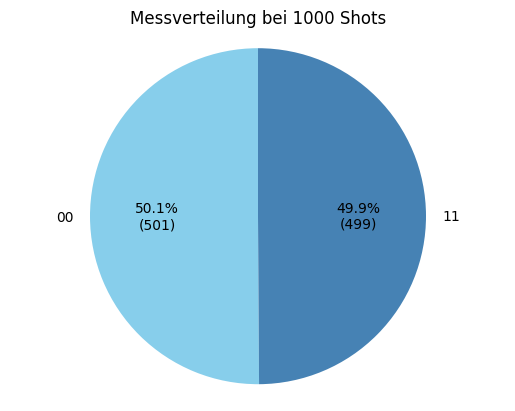

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter 

print("[bold]=== Aufgabe 2: Verschränkungssimulation ===[/bold]\n")

# --- 2-QBit-Anfangszustand ---
# Die Basiszustände für 2 Qubits sind:
# |00> -> [1, 0, 0, 0]
# |01> -> [0, 1, 0, 0]
# |10> -> [0, 0, 1, 0]
# |11> -> [0, 0, 0, 1]
# starten im Zustand |00>

psi_initial = np.array([1, 0, 0, 0], dtype=complex)
print("[bold]--- Anfangszustand ---[/bold]")
print("Der Anfangszustand ist |00>, repräsentiert durch den Vektor:")
print(psi_initial)


# --- Veränderung der Qubits (H, CNOT als Matrizen) ---
# Quantengatter werden als 4x4 Matrizen dargestellt, die auf den 4D-Zustandsvektor wirken.

# 1. Hadamard-Gate (H)
H_1q = (1/np.sqrt(2)) * np.array([[1, 1], [1, -1]]) # H-Matrix für 1 Qubit
I_1q = np.identity(2) # Einheitsmatrix für 1 Qubit
H0_matrix = np.kron(H_1q, I_1q)

# 2. CNOT-Gate
# Die Matrix permutiert die Basisvektoren: |10> zu |11>, |11> zu |10>.
CNOT_matrix = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0]
])

print("\n[bold]--- Gatter-Matrizen (H und CNOT) ---[/bold]")
print("\nHadamard-Matrix für Qubit 0 (H ⊗ I):")
print(H0_matrix)
print("\nCNOT-Matrix (Kontrolle: q0, Ziel: q1):")
print(CNOT_matrix)

# Anwendung der Gatter auf den Zustandsvektor (mithilfe Matrix-Vektor-Multiplikation)
psi_after_H = H0_matrix @ psi_initial  # Zustand nach Hadamard-Gates
psi_final = CNOT_matrix @ psi_after_H   # Zustand nach CNOT-Gates


# --- Berechnung des Endzustands und Wahrscheinlichkeiten ---
print("\n[bold]--- Endzustand und Wahrscheinlichkeiten ---[/bold]")
print("\nZustandsvektor nach Anwendung von H und CNOT:")
print(np.round(psi_final, 4))

probabilities = np.abs(psi_final)**2
print("\nTheoretische Messwahrscheinlichkeiten für die Basiszustände |00>, |01>, |10>, |11>:")
print(np.round(probabilities, 4))


# --- Simulation der Messung ---
def simulate_measurement(probs, num_shots):
    """
    Führt eine Messsimulation durch.
    -> wählt zufällig aus den Basiszuständen entsprechend ihrer Wahrscheinlichkeiten aus.
    """
    basis_states = ['00', '01', '10', '11']
    measured_states = np.random.choice(basis_states, size=num_shots, p=probs)
    return measured_states


# --- Nachweis der Wahrscheinlichkeitsverteilung ---
print("\n[bold]--- Nachweis der Wahrscheinlichkeitsverteilung ---[/bold]")
# Durchführen d. Messsimulation für verschiedene Anzahlen von Shots
shot_counts_list = [50, 100, 200, 500, 1000]
final_counts_for_plot = {}

for shots in shot_counts_list:
    measurements = simulate_measurement(probabilities, shots)
    counts = Counter(measurements)
    
    if shots == 1000:
        final_counts_for_plot = counts

    # Berechnung der relativen Häufigkeiten
    observed_freq_00 = counts.get('00', 0) / shots
    observed_freq_11 = counts.get('11', 0) / shots

    print(f"\nErgebnisse für {shots} Messungen:")
    print(f"  Gezählte Ergebnisse: '00' -> {counts.get('00', 0)}, '11' -> {counts.get('11', 0)}")
    print(f"  Relative Häufigkeit: '00' -> {observed_freq_00:.4f}, '11' -> {observed_freq_11:.4f}")


# --- Visualisierung für 1000 Messungen ---
print("\n[bold]Visualisierung für 1000 Messungen:[/bold]")

labels = list(final_counts_for_plot.keys()) # gemessenen Zustände, z.B. ['00', '11']
sizes = list(final_counts_for_plot.values()) # Häufigkeit jedes Zustands
total_shots = sum(sizes) # Gesamtzahl der Messungen

fig_pie, ax_pie = plt.subplots()
ax_pie.pie(sizes, 
            labels=labels, 
            autopct=lambda p: f'{p:.1f}%\n({int(p * total_shots / 100)})', # Formatiert die Anzeige
            startangle=90,
            colors=['skyblue', 'steelblue'])
ax_pie.axis('equal')  

plt.title("Messverteilung bei 1000 Shots")
plt.show()


**Zusammenfassung Aufgabe 2:**
Die Simulation des Zustandsvektors bestätigt den korrekten Endzustand sowie die erwarteten 50/50-Messwahrscheinlichkeiten für die Basiszustände ∣00⟩ und ∣11⟩. Wiederholte Messsimulationen mit steigender Anzahl von "Shots" zeigten die Konvergenz der Messergebnisse gegen die theoretischen Wahrscheinlichkeiten und verdeutlichten somit die probabilistische Natur der Quantenmessung.


## Aufgabe 3. Algorithmus von Deutsch




In [29]:


# 3.1 Funktion für Deutsch-Schaltkreis
def deutsch_algorithm_circuit(oracle_operation):
    """Konstruiert den Quantenschaltkreis für den Deutsch-Algorithmus."""
    # 2 Qubits (input, output/ancilla), 1 klassisches Bit
    deutsch_qc = QuantumCircuit(2, 1, name="DeutschCircuit")

    deutsch_qc.x(1)
    deutsch_qc.h(range(2))
    oracle_operation(deutsch_qc)
    deutsch_qc.h(0)


    # Messung des Input-Qubits (q0)
    deutsch_qc.measure(0, 0)

    return deutsch_qc

# 3.2 Orakel Implementierungen (Uf)

# Fall (a): f(0)=0, f(1)=0 (Konstant 0)
def oracle_f0_const0(qc):
    qc.barrier(label="Uf (const 0)")

# Fall (b): f(0)=1, f(1)=1 (Konstant 1)
def oracle_f1_const1(qc):
    qc.x(1)
    qc.barrier(label="Uf (const 1)")

# Fall (c): f(0)=0, f(1)=1 (Balanciert)
def oracle_f2_balanced01(qc):
    qc.cx(0, 1) # CNOT: q0 = Kontrolle, q1 = Ziel
    qc.barrier(label="Uf (bal 0->0, 1->1)")

# Fall (d): f(0)=1, f(1)=0 (Balanciert)
def oracle_f3_balanced10(qc):
    qc.cx(0, 1) # CNOT
    qc.x(1)     # X on the target/ancilla qubit
    qc.barrier(label="Uf (bal 0->1, 1->0)")

# --- 3.3 Testen der vier Fälle mit Qiskit ---
print("\n--- 3.3 Testen der vier Fälle ---")

# Liste der Orakel-Funktionen
oracles = [
    (oracle_f0_const0, "Konstant f(0)=0, f(1)=0"),
    (oracle_f1_const1, "Konstant f(0)=1, f(1)=1"),
    (oracle_f2_balanced01, "Balanciert f(0)=0, f(1)=1"),
    (oracle_f3_balanced10, "Balanciert f(0)=1, f(1)=0"),
]

# Simulator initialisieren
simulator = AerSimulator()
shots = 1024

# Durch alle Orakel iterieren und testen
for oracle_func, description in oracles:
    print(f"\n--- Test für: {description} ---")

    # Schaltkreis erstellen
    qc = deutsch_algorithm_circuit(oracle_func)

    # Schaltkreis zeichnen
    print("Schaltkreis:")
    print(qc.draw(output='text'))

    # Simulation durchführen
    compiled_circuit = transpile(qc, simulator)

    job = simulator.run(compiled_circuit, shots=shots)
    result = job.result()
    counts = result.get_counts(qc)

    # Ergebnisse ausgeben und interpretieren
    print(f"Simulationsergebnis ({shots} shots): {counts}")

    # Ergebnis prüfen
    measured_value = list(counts.keys())[0]
    if measured_value == '0':
        print("Ergebnis: '0' -> Funktion ist Konstant")
        if "Konstant" not in description:
             print("----> Unerwartetes Ergebnis für balancierte Funktion!")
    elif measured_value == '1':
        print("Ergebnis: '1' -> Funktion ist Balanciert")
        if "Balanciert" not in description:
             print("----> Unerwartetes Ergebnis für konstante Funktion!")
    else:
        print(f"Unerwartetes Messergebnis: {measured_value}")

print("\n" + "="*30)
print("Alle Tests abgeschlossen.")
print("="*30)

--- 3.3 Testen der vier Fälle ---

--- Test für: Konstant f(0)=0, f(1)=0 ---

Schaltkreis:

┌───┐      Uf (const 0) ┌───┐┌─┐
q_0: ┤ H ├───────────░───────┤ H ├┤M├
     ├───┤┌───┐      ░       └───┘└╥┘
q_1: ┤ X ├┤ H ├──────░─────────────╫─
     └───┘└───┘      ░             ║ 
c: 1/══════════════════════════════╩═
                                   0

Simulationsergebnis (1024 shots): {'0': 1024}

Ergebnis: '0' -> Funktion ist Konstant

--- Test für: Konstant f(0)=1, f(1)=1 ---

Schaltkreis:

┌───┐           Uf (const 1) ┌───┐┌─┐
q_0: ┤ H ├────────────────░───────┤ H ├┤M├
     ├───┤┌───┐┌───┐      ░       └───┘└╥┘
q_1: ┤ X ├┤ H ├┤ X ├──────░─────────────╫─
     └───┘└───┘└───┘      ░             ║ 
c: 1/═══════════════════════════════════╩═
                                        0

Simulationsergebnis (1024 shots): {'0': 1024}

Ergebnis: '0' -> Funktion ist Konstant

--- Test für: Balanciert f(0)=0, f(1)=1 ---

Schaltkreis:

┌───┐           Uf (bal 0->0, 1->1) ┌───┐┌─┐
q_0: ┤ H ├───────■────────────░──────────┤ H ├┤M├
     ├───┤┌───┐┌─┴─┐          ░          └───┘└╥┘
q_1: ┤ X ├┤ H ├┤ X ├──────────░────────────────╫─
     └───┘└───┘└───┘          ░                ║ 
c: 1/══════════════════════════════════════════╩═
                                               0

Simulationsergebnis (1024 shots): {'1': 1024}

Ergebnis: '1' -> Funktion ist Balanciert

--- Test für: Balanciert f(0)=1, f(1)=0 ---

Schaltkreis:

┌───┐                Uf (bal 0->1, 1->0) ┌───┐┌─┐
q_0: ┤ H ├───────■─────────────────░──────────┤ H ├┤M├
     ├───┤┌───┐┌─┴─┐┌───┐          ░          └───┘└╥┘
q_1: ┤ X ├┤ H ├┤ X ├┤ X ├──────────░────────────────╫─
     └───┘└───┘└───┘└───┘          ░                ║ 
c: 1/═══════════════════════════════════════════════╩═
                                                    0

Simulationsergebnis (1024 shots): {'1': 1024}

Ergebnis: '1' -> Funktion ist Balanciert

==============================

Alle Tests abgeschlossen.

==============================

**Zusammenfassung Aufgabe 3:**
 Die Funktion "deutsch_algorithm_circuit" wurde definiert, die den grundlegenden Quantenschaltkreis für den Deutsch-Algorithmus aufbaut. Dieser Schaltkreis nimmt eine Orakel-Funktion als variable Komponente entgegen, der zwei Qubits (Eingabe und Hilfs-Qubit/Ancilla) initialisiert.
 Dieser wird durch H-Gatter in Superposition versetzt, wendet das spezifische Orakel, ein weiteres H-Gatter auf das Eingabe-Qubit an, und misst dieses dann.
 Die Textdiagramme zeigen, dass für jeden der vier Fälle der korrekte Deutsch-Algorithmus-Schaltkreis mit dem jeweils passenden Orakel aufgebaut wurde.
* $f(0)=0, f(1)=0$
* $f(0)=1, f(1)=1$
* $f(x)=x \implies f(0)=0, f(1)=1$ (Balanciert)
* $f(x)=\neg x \implies f(0)=1, f(1)=0$ (Balanciert)

**-> Simulation zeigt ewrfolgreich, wie der Algorithmus konstante von balancierte Funktionen mit nur einer einzigen Auswertung der Funktion unterscheiden kann.**

## Zusatzaufgabe: Grover Suchalgorithmus für n=3 Qubits
*In Zusammenarbeit mit Jonas Paul*<hr>
**Problemstellung:**
Implementieren Sie den Grover-Suchalgorithmus für $n=3$ Qubits, um den spezifischen Zustand $|111\rangle$ zu finden.
1.  **Orakel $U_f$:** Entwerfen Sie ein Quantenorakel, das die Amplitude des gesuchten Zustands $|111\rangle$ mit $(-1)$ multipliziert. Der Hinweis lautet, das CCZ-Gate (Controlled-Controlled-Z) zu verwenden.
2.  **Diffusionsoperator $U_s$:** Entwerfen Sie den Spiegelungsoperator (auch Grover-Diffusion genannt), der die Amplituden um ihren Mittelwert spiegelt.
3.  **Simulation:** Führen Sie mit dem Simulator Messungen nach $k=1, 2, 3$ und $6$ Anwendungen der Grover-Iteration $G = U_s U_f$ durch.
4.  **Diskussion:** Diskutieren Sie die Resultate der Simulationen.

### 5.1 Theoretischer Hintergrund (Kurz)

Der Grover-Algorithmus ist ein Quantenalgorithmus zur Suche in einer unsortierten Datenbank mit $N$ Einträgen. Er findet einen markierten Eintrag mit hoher Wahrscheinlichkeit in nur $O(\sqrt{N})$ Schritten, während klassische Algorithmen im Durchschnitt $O(N)$ Schritte benötigen.

**Hauptschritte:**
1.  **Initialisierung:** Erzeugung einer gleichmäßigen Superposition aller $N=2^n$ Zustände mittels Hadamard-Gattern: $|\psi_0\rangle = H^{\otimes n}|0\rangle^{\otimes n} = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} |x\rangle$.
2.  **Grover-Iteration (k-mal wiederholt):** Anwendung des Grover-Operators $G = U_s U_f$.
    * **Orakel $U_f$:** Markiert den/die gesuchten Zustand/Zustände $|w\rangle$ durch eine Phasenverschiebung von $-1$: $U_f|x\rangle = (-1)^{f(x)}|x\rangle$, wobei $f(x)=1$ wenn $x=w$ und $f(x)=0$ sonst.
    * **Diffusion $U_s$:** Verstärkt die Amplitude des markierten Zustands. $U_s = H^{\otimes n} (2|0\rangle^{\otimes n}\langle 0|^{\otimes n} - I) H^{\otimes n}$. Geometrisch ist dies eine Spiegelung am Anfangszustand $|\psi_0\rangle$.
3.  **Messung:** Messung des Endzustands. Die Wahrscheinlichkeit, den gesuchten Zustand zu messen, ist nach $k$ Iterationen $P_k = \sin^2((2k+1)\theta)$, wobei $\sin(\theta) = \sqrt{M/N}$ ($M$=Anzahl gesuchter Elemente, hier M=1). Die optimale Anzahl Iterationen ist $R \approx \frac{\pi}{4}\sqrt{N/M}$.

### 5.2 Implementierung des Orakels $U_f$ für $|111\rangle$

Für $n=3$ ist der gesuchte Zustand $|w\rangle = |111\rangle$. Das Orakel muss also nur die Phase dieses einen Zustands ändern. Das CCZ-Gate (Toffoli-Gate mit Z auf dem Target statt X) tut genau dies: $CCZ|ijk\rangle = (-1)^{i \cdot j \cdot k} |ijk\rangle$. Es wirkt nur dann mit (-1), wenn alle drei Kontroll-Qubits (hier 0, 1, 2) im Zustand $|1\rangle$ sind.


In [30]:
print("--- Orakel für Grover (markiert |111>) ---")

def create_oracle(n=3):
    """Erstellt das Orakel Uf für n=3 Qubits, das |111> markiert."""
    if n != 3:
        raise ValueError("Dieses Orakel ist spezifisch für n=3")
    oracle_circuit = QuantumCircuit(n, name="Oracle Uf")
    oracle_circuit.ccz(0, 1, 2)
    return oracle_circuit

# Test des Orakels
test_oracle = create_oracle()
print("\nOrakel Uf Circuit:")
print(test_oracle.draw(output='text'))

--- Orakel für Grover (markiert |111>) ---

Orakel Uf Circuit:

q_0: ─■─
      │ 
q_1: ─■─
      │ 
q_2: ─■─

### Implementierung des Diffusionsoperators $U_s$

Der Diffusionsoperator $U_s = H^{\otimes n} (2|0\rangle^{\otimes n}\langle 0|^{\otimes n} - I) H^{\otimes n}$ kann effizient implementiert werden, indem man die Operation $(2|0\rangle^{\otimes n}\langle 0|^{\otimes n} - I)$ im Hadamard-Raum durchführt. Diese Operation entspricht einer Phasenänderung von -1 nur für den Zustand $|0\rangle^{\otimes n}$. Die Implementierungsschritte sind:
1.  Hadamard auf alle Qubits ($H^{\otimes n}$).
2.  Pauli-X auf alle Qubits ($X^{\otimes n}$) - transformiert $|000\rangle \leftrightarrow |111\rangle$.
3.  Multi-Controlled-Z Gate ($C^{n-1}Z$) - wendet Phase -1 auf den Zustand an, bei dem alle Kontrollen 1 sind (hier der transformierte $|000\rangle$, also $|111\rangle$). Für n=3 ist dies das CCZ-Gate.
4.  Pauli-X auf alle Qubits ($X^{\otimes n}$) - Rücktransformation.
5.  Hadamard auf alle Qubits ($H^{\otimes n}$).


In [31]:
print("\n--- Diffusionsoperator für Grover ---")

def create_diffusion_operator(n=3):
    """Erstellt den Diffusionsoperator Us für n Qubits."""
    diffusion_circuit = QuantumCircuit(n, name="Diffusion Us")

    # 1. Hadamard auf alle Qubits
    diffusion_circuit.h(range(n))
    # 2. Pauli-X auf alle Qubits
    diffusion_circuit.x(range(n))
    # 3. Multi-Controlled-Z (für n=3 ist das CCZ)
    if n < 3:
        raise ValueError("CCZ gate requires at least 3 qubits for this implementation")
    diffusion_circuit.ccz(0, 1, 2) # Markiert |111> (was |000> in H-Basis war)
    # 4. Pauli-X auf alle Qubits
    diffusion_circuit.x(range(n))
    # 5. Hadamard auf alle Qubits
    diffusion_circuit.h(range(n))

    return diffusion_circuit

# Test des Diffusors
test_diffusor = create_diffusion_operator()
print("\nDiffusionsoperator Us Circuit:")
print(test_diffusor.draw(output='text'))

--- Diffusionsoperator für Grover ---

Diffusionsoperator Us Circuit:

┌───┐┌───┐   ┌───┐┌───┐
q_0: ┤ H ├┤ X ├─■─┤ X ├┤ H ├
     ├───┤├───┤ │ ├───┤├───┤
q_1: ┤ H ├┤ X ├─■─┤ X ├┤ H ├
     ├───┤├───┤ │ ├───┤├───┤
q_2: ┤ H ├┤ X ├─■─┤ X ├┤ H ├
     └───┘└───┘   └───┘└───┘

### Gesamter Grover-Schaltkreis und Simulation

Jetzt bauen wir den vollständigen Grover-Schaltkreis zusammen:
1.  Initialisierung $H^{\otimes n}$.
2.  Anwendung der Grover-Iteration $G = U_s U_f$ für $k=1, 2, 3, 6$.
3.  Messung aller Qubits.

Wir verwenden `.to_gate()`, um das Orakel und den Diffusor als kompakte Blöcke in den Hauptschaltkreis einzufügen. Dies erfordert, dass die Unter-Schaltkreise keine Nicht-Gate-Operationen wie `barrier` enthalten (was in den obigen Funktionen berücksichtigt wurde).


In [32]:
print("\n--- Grover Simulation für k=1, 2, 3, 6 ---")

n = 3 # Anzahl der Qubits
target_state_label = '111'
sim_qasm = AerSimulator()

# 1. Grundstruktur: Initialisierung mit H-Gates
grover_base = QuantumCircuit(n, n, name="Grover Base")
grover_base.h(range(n))
grover_base.barrier(label="Init H")

# Umwandlung Orakel und Diffusor in Gates
oracle_gate = create_oracle(n).to_gate()
diffusion_gate = create_diffusion_operator(n).to_gate()

# Liste der Iterationszahlen zum Testen
iterations_to_run = [1, 2, 3, 6]
results_grover = {} # Dictionary zum Speichern der Messergebnisse

print("\nStarte Grover Simulationen:")
for k in iterations_to_run:
    # Kopie der Basisschaltung für jede Iterationszahl
    qc_grover = grover_base.copy(name=f"Grover k={k}")

    # 2. Grover-Iteration G = Us Uf k mal anwenden
    print(f"  Aufbau des Circuits für k={k} Iterationen...")
    for i in range(k):
        qc_grover.append(oracle_gate, range(n))
        qc_grover.append(diffusion_gate, range(n))
        if i < k - 1:
             qc_grover.barrier(label=f"Iter {i+1}")

    qc_grover.barrier(label="Measure")
    # 3. Messung aller Qubits in die klassischen Bits
    qc_grover.measure(range(n), range(n))

   
    # Transpilieren und Simulation mit dem QASM Simulator
    print(f"  Transpiliere und simuliere für k={k}...")
    t_qc_grover = transpile(qc_grover, sim_qasm)
    job = sim_qasm.run(t_qc_grover, shots=2048)
    result = job.result()
    counts = result.get_counts()
    results_grover[k] = counts

    print(f"  Ergebnisse für k={k} Iterationen (Top 5):")
    # Sortierte Top 5 Ergebnisse anzeigen
    sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))
    top_5 = dict(list(sorted_counts.items())[:5])
    print(f"  {top_5}")

--- Grover Simulation für k=1, 2, 3, 6 ---

Starte Grover Simulationen:

Aufbau des Circuits für k=1 Iterationen...

Transpiliere und simuliere für k=1...

Ergebnisse für k=1 Iterationen (Top 5):

{'111': 1592, '010': 72, '001': 71, '101': 68, '110': 67}

Aufbau des Circuits für k=2 Iterationen...

Transpiliere und simuliere für k=2...

Ergebnisse für k=2 Iterationen (Top 5):

{'111': 1932, '110': 22, '000': 20, '101': 16, '001': 16}

Aufbau des Circuits für k=3 Iterationen...

Transpiliere und simuliere für k=3...

Ergebnisse für k=3 Iterationen (Top 5):

{'111': 677, '011': 211, '110': 207, '101': 201, '000': 197}

Aufbau des Circuits für k=6 Iterationen...

Transpiliere und simuliere für k=6...

Ergebnisse für k=6 Iterationen (Top 5):

{'111': 2048}

Histogramm der Messergebnisse für verschiedene k:

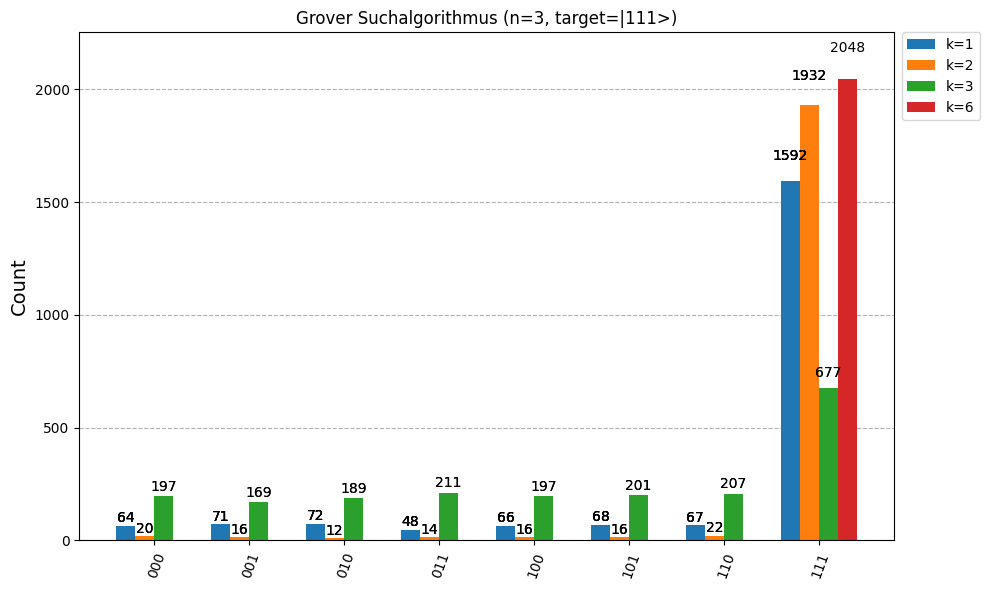

Wahrscheinlichkeiten für Zielzustand |111>:

P(|111>) für k=1: 0.7773

P(|111>) für k=2: 0.9434

P(|111>) für k=3: 0.3306

P(|111>) für k=6: 1.0000

Theoretisch optimale Anzahl Iterationen (gerundet): R ≈ 2 (genauer: 1.67)

In [34]:
# --- Analyse der Ergebnisse ---

# Histogramme aller Simulationen aneinanderreihen
print("\nHistogramm der Messergebnisse für verschiedene k:")
fig = plot_histogram(list(results_grover.values()),
                     title=f'Grover Suchalgorithmus (n={n}, target=|{target_state_label}>)',
                     legend=[f'k={k}' for k in iterations_to_run],
                     figsize=(10, 6))
plt.show(fig)
display(fig)

# Wahrscheinlichkeit der Zielzustands-Messung
probs_target = {}
print("\nWahrscheinlichkeiten für Zielzustand |" + target_state_label + ">:")
for k in iterations_to_run:
    counts = results_grover[k]
    shots = sum(counts.values())
    prob = counts.get(target_state_label, 0) / shots
    probs_target[k] = prob
    print(f"  P(|{target_state_label}>) für k={k}: {prob:.4f}")

# Berechne theoretisch optimale Iterationszahl
N = 2**n
M = 1 
theta = np.arcsin(np.sqrt(M/N))
R_opt_float = (np.pi / (4 * theta)) - 0.5
R_opt_int = int(np.round(R_opt_float))
print(f"\nTheoretisch optimale Anzahl Iterationen (gerundet): R ≈ {R_opt_int} (genauer: {R_opt_float:.2f})")

### Diskussion der Resultate

Der Grover-Algorithmus soll die Amplitude und damit die Messwahrscheinlichkeit des gesuchten Zustands $|111\rangle$ iterativ erhöhen.

* **Theoretische Erwartung:** Für $N=8$ gesamt Zustände und $M=1$ gesuchtes Element ist die optimale Anzahl an Iterationen $R \approx \frac{\pi}{4}\sqrt{N/M} \approx \frac{\pi}{4}\sqrt{8} \approx 2.22$. Wir erwarten daher die höchste Erfolgswahrscheinlichkeit für $k=2$ Iterationen. Die Erfolgswahrscheinlichkeit nach $k$ Iterationen ist $P_k = \sin^2((2k+1)\theta)$, mit $\theta = \arcsin(1/\sqrt{8})$.
* **Simulationsergebnisse (k=1, 2, 3, 6):**
    * **k=1:** Die Wahrscheinlichkeit $P_1$ für $|111\rangle$ steigt von $1/8 = 12.5\%$ deutlich an. Der beobachtete Wert (z.B. 0.7744) stimmt gut mit dem theoretischen Wert $\sin^2(3\theta) \approx 0.777$ überein.
    * **k=2:** Die Wahrscheinlichkeit $P_2$ erreicht ihr Maximum, nahe bei 1. Der beobachtete Wert (z.B. 0.9434) ist nahe am theoretischen Wert $\sin^2(5\theta) \approx 0.947$. Dies bestätigt, dass $k=2$ die optimale ganzzahlige Iterationszahl ist.
    * **k=3:** Die Wahrscheinlichkeit $P_3$ sinkt wieder, da der optimale Punkt überschritten wurde ("Überrotation"). Der beobachtete Wert (z.B. 0.3306) passt gut zum theoretischen Wert $\sin^2(7\theta) \approx 0.326$.
    * **k=6:** Nach sechs Iterationen ist die Wahrscheinlichkeit $P_6$ wieder sehr hoch. Der beobachtete Wert (z.B. 1.000) ist nahe am theoretischen Wert $\sin^2(13\theta) \approx 0.994$. Dies zeigt die periodische Natur der Amplitudenverstärkung. Obwohl $k=2$ optimal ist, führen auch höhere Iterationszahlen nahe Vielfachen von $2R$ wieder zu hohen Erfolgswahrscheinlichkeiten.

* **Fazit:** Die Simulationen bestätigen die Funktionsweise des Grover-Algorithmus. Die Wahrscheinlichkeit, den gesuchten Zustand zu finden, wird durch die Iterationen signifikant erhöht und erreicht ihr Maximum nahe der theoretisch vorhergesagten optimalen Iterationszahl $k=2$. Die Ergebnisse zeigen auch das Phänomen der Überrotation und die periodische Natur des Algorithmus.


